<a href="https://colab.research.google.com/github/usugunawan15/DTI-Telkom/blob/master/Tugas_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering**

Usu Gunawan | DS0223 


 **Import Library**

In [17]:
# Import libraries
import os
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

**Data Preprocessing**

In [7]:
df_data = pd.read_csv ('https://raw.githubusercontent.com/usugunawan15/DTI-Telkom/master/data/Mall_Customers.csv')
df_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df_data = pd.read_csv ('https://raw.githubusercontent.com/usugunawan15/DTI-Telkom/master/data/Mall_Customers.csv')
df_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Cek data apakah ada data null atau tidak

In [12]:
df_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
df_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


**Visualisasi Data**

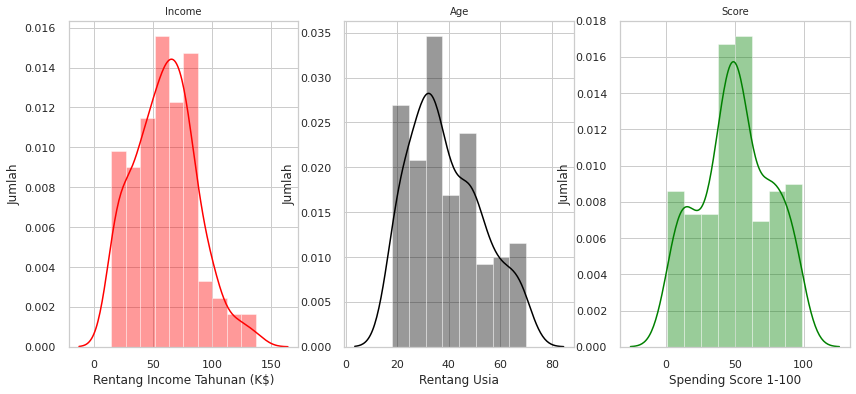

In [22]:
plt.rcParams['figure.figsize']=(14,6)

plt.subplot(1, 3, 1)
sns.set(style= 'whitegrid')
sns.distplot(df_data['Annual Income (k$)'], color='red')
plt.title('Income', fontsize=10)
plt.xlabel('Rentang Income Tahunan (K$)')
plt.ylabel('Jumlah')

plt.subplot(1, 3, 2)
sns.set(style= 'whitegrid')
sns.distplot(df_data['Age'], color='black')
plt.title('Age', fontsize=10)
plt.xlabel('Rentang Usia')
plt.ylabel('Jumlah')

plt.subplot(1, 3, 3)
sns.set(style= 'whitegrid')
sns.distplot(df_data['Spending Score (1-100)'], color='green')
plt.title('Score', fontsize=10)
plt.xlabel('Spending Score 1-100')
plt.ylabel('Jumlah')

plt.show()



Dari grafik diatas dapat diamati pola distribusi/persebaran dari income tahunan dan usia customer, dimana hanya ada sediit customer yang mempunyai income lebih dari 100 ribu usd.

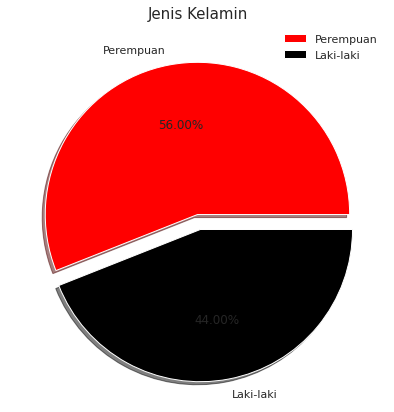

In [24]:
# Pembagian data customer berdasarkan jenis kelamin
labels = ['Perempuan', 'Laki-laki']
size = df_data['Gender'].value_counts()
colors = ['red', 'black']
explode = [0, 0.1]
# Pie chart
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Jenis Kelamin', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()



Dari  Pie Chart diatas bisa dilihat bahwa distribusi perempuan di mall lebih banyak daripada laki laki

**PreProcessing**

In [28]:
df_data = df_data.drop(['CustomerID', 'Gender'], axis=1)
df_data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [53]:
scaler = StandardScaler()
df_data = scaler.fit_transform(df_data)

**K-Means Clustering Models**

In [51]:

within_sum_squares = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, 
                  init='k-means++',
                  random_state=42)
  kmeans.fit(df_data)
  within_sum_squares.append(kmeans.inertia_)

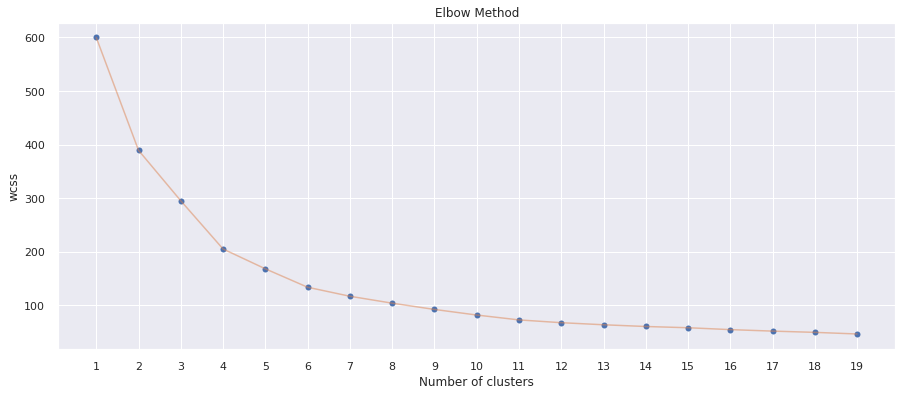

In [52]:
# Visualisasi 
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(1,20), within_sum_squares, 'o')
plt.plot(np.arange(1,20), within_sum_squares , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.xticks(np.arange(1,20))
plt.show()



In [57]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,20):
    km = KMeans(n_clusters=i, random_state=42).fit(df_data)
    preds = km.predict(df_data)
    
    silhouette = silhouette_score(df_data,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))


Silhouette score for number of cluster(s) 2: 0.3354719289400457
Silhouette score for number of cluster(s) 3: 0.357793388710272
Silhouette score for number of cluster(s) 4: 0.4039582785148566
Silhouette score for number of cluster(s) 5: 0.41664341513732767
Silhouette score for number of cluster(s) 6: 0.42742814991580175
Silhouette score for number of cluster(s) 7: 0.419219052149692
Silhouette score for number of cluster(s) 8: 0.410096022867814
Silhouette score for number of cluster(s) 9: 0.4181683549386527
Silhouette score for number of cluster(s) 10: 0.40230738279710865
Silhouette score for number of cluster(s) 11: 0.41417725035853736
Silhouette score for number of cluster(s) 12: 0.38856650272694304
Silhouette score for number of cluster(s) 13: 0.3701769334880744
Silhouette score for number of cluster(s) 14: 0.3664548349785368
Silhouette score for number of cluster(s) 15: 0.34196945323782285
Silhouette score for number of cluster(s) 16: 0.33534797541824213
Silhouette score for number o